# Supervised Learning


In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from utils.regression import compute_cost, compute_regression, gradient_descent

plt.style.use("../labs/deeplearning.mplstyle")

## Linear Regression


Equation:

$$
 f_{w,b}(x) = wx + b
$$


In [2]:
x_train = np.array([1.0, 2.0])  # (size in 1000 square feet)
y_train = np.array([300.0, 500.0])  # (price in 1000s of dollars)
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

x_train = [1. 2.]
y_train = [300. 500.]


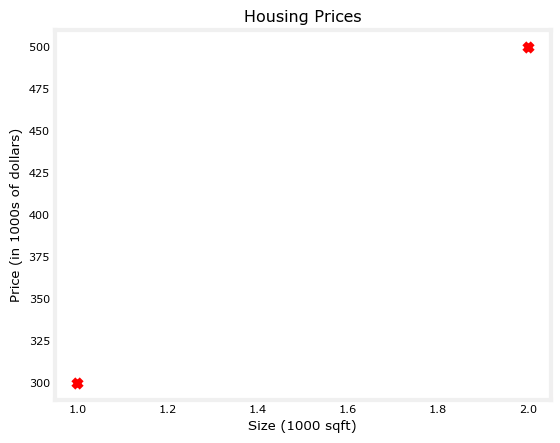

In [3]:
# Plot the data points
plt.scatter(x_train, y_train, marker="x", c="r")
# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel("Price (in 1000s of dollars)")
# Set the x-axis label
plt.xlabel("Size (1000 sqft)")
plt.show()

In [4]:
w = 200
b = 100

Model output: [300. 500.]


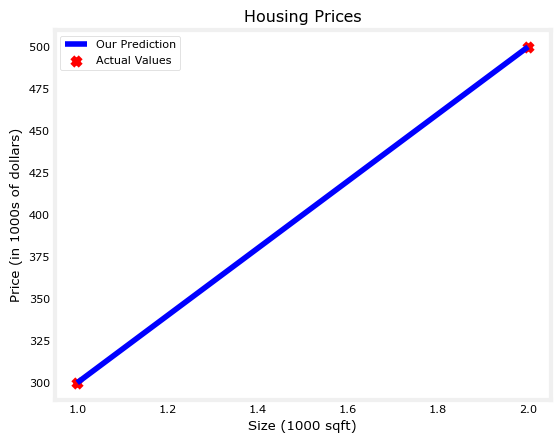

In [5]:
# compute the model output
model_output = compute_regression(w, b, x_train)
print(f"Model output: {model_output}")

# Plot our model prediction
plt.plot(x_train, model_output, c="b", label="Our Prediction")

# Plot the data points
plt.scatter(x_train, y_train, marker="x", c="r", label="Actual Values")

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel("Price (in 1000s of dollars)")
# Set the x-axis label
plt.xlabel("Size (1000 sqft)")
plt.legend()
plt.show()

## Cost Function


Equation:

$$
 J_{w,b} = \frac{1}{2m} \sum_{i=1}^{m} (f_{w,b}(x_{(i)}) - y_{(i)})^2
$$


Weights: [  0 100 200 300 400]
Cost: [50000. 12500.     0. 12500. 50000.]
Current Cost: 0.0


/var/folders/4q/zg_6xsv109qg9txqw0dbz40w0000gn/T/ipykernel_1218/1531888150.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


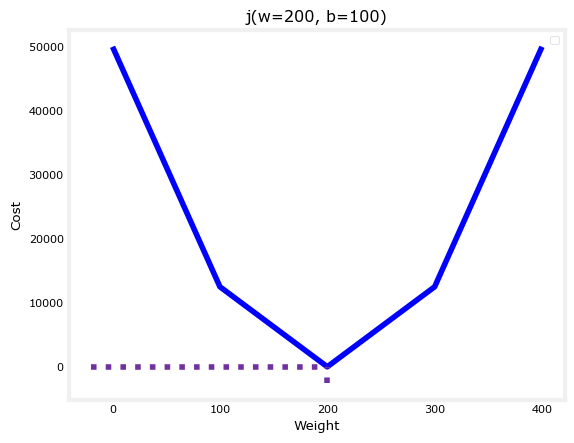

In [6]:
weights = np.array(range(0, 500, 100))
print(f"Weights: {weights}")

j_wb = np.array([compute_cost(x_train, y_train, weight, b) for weight in weights])
print(f"Cost: {j_wb}")

cur_cost = compute_cost(x_train, y_train, w, b)
print(f"Current Cost: {cur_cost}")

# Plot our model prediction
plt.plot(weights, j_wb, c="b")
plt.hlines(cur_cost, plt.gca().get_xlim()[0], w, lw=4, color="#7030A0", ls="dotted")
plt.vlines(w, plt.gca().get_ylim()[0], cur_cost, lw=4, color="#7030A0", ls="dotted")

# Set the title
plt.title(f"j({w=}, {b=})")
# Set the y-axis label
plt.ylabel("Cost")
# Set the x-axis label
plt.xlabel("Weight")
plt.legend()
plt.show()

### Cost Function in 3D


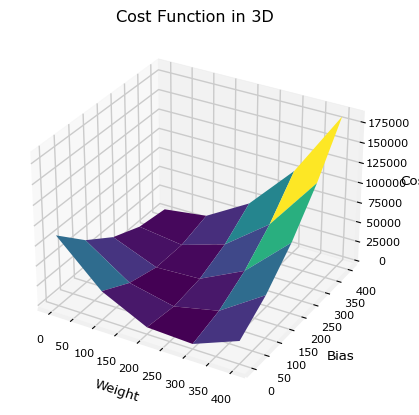

In [7]:
weights = np.array(range(0, 500, 100))
biases = np.array(range(0, 500, 100))

# Create a meshgrid for weights and biases
W, B = np.meshgrid(weights, biases)

# Compute the cost for each combination of weight and bias
Z = np.array(
    [
        [compute_cost(x_train, y_train, w, b) for w, b in zip(row_w, row_b)]
        for row_w, row_b in zip(W, B)
    ]
)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Plot the surface
ax.plot_surface(W, B, Z, cmap="viridis")

# Set the title
ax.set_title("Cost Function in 3D")

# Set the x-axis label
ax.set_xlabel("Weight")

# Set the y-axis label
ax.set_ylabel("Bias")

# Set the z-axis label
ax.set_zlabel("Cost")

plt.show()

## Gradient Descent


Equations:

In order to find w and b, we need to compute the partial derivatives of J(w,b) with respect to w and b.

$$
\text{repeat until convergence: } \{
$$

$$
  w = w - \alpha \frac{\partial J}{\partial w}(J(w,b))
$$

$$
  b = b - \alpha \frac{\partial J}{\partial b}(J(w,b))
$$

$$
\}
$$

where:

- $\alpha$ is the learning rate
- $\alpha$ is always a positive number
- $w$ and $b$ will simultaneously updated.

derived equations:

$$
\frac{\partial J}{\partial w}(J(w,b)) = \frac{1}{m} \sum_{i=1}^{m} (f_{w,b}(x_{(i)}) - y_{(i)})x_{(i)}
$$

$$
\frac{\partial J}{\partial b}(J(w,b)) = \frac{1}{m} \sum_{i=1}^{m} (f_{w,b}(x_{(i)}) - y_{(i)})
$$

which can be simplified to:

$$
\text{repeat until convergence: } \{
$$

$$
w = w - \alpha \frac{1}{m} \sum_{i=1}^{m} (f_{w,b}(x_{(i)}) - y_{(i)})x_{(i)}
$$

$$
b = b - \alpha \frac{1}{m} \sum_{i=1}^{m} (f_{w,b}(x_{(i)}) - y_{(i)})
$$

$$
\}
$$


> **Note 1**:
>
> - By using the partial derivatives, we can find the minimum value of the cost function called **local minimum**.
> - _Whereas, The most minimum value of the cost function is called **global minimum**._

> **Note 2**:
>
> - _The bowl shape cost function is called **convex function**._
> - **Convex function** always has single global minimum.


In [8]:
# initialize parameters
w_init = 0
b_init = 0

# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2

# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(
    x_train, y_train, w_init, b_init, tmp_alpha, iterations
)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 7.93e+04  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  6.500e+00, b: 4.00000e+00
Iteration 1000: Cost 3.41e+00  dj_dw: -3.712e-01, dj_db:  6.007e-01   w:  1.949e+02, b: 1.08228e+02
Iteration 2000: Cost 7.93e-01  dj_dw: -1.789e-01, dj_db:  2.895e-01   w:  1.975e+02, b: 1.03966e+02
Iteration 3000: Cost 1.84e-01  dj_dw: -8.625e-02, dj_db:  1.396e-01   w:  1.988e+02, b: 1.01912e+02
Iteration 4000: Cost 4.28e-02  dj_dw: -4.158e-02, dj_db:  6.727e-02   w:  1.994e+02, b: 1.00922e+02
Iteration 5000: Cost 9.95e-03  dj_dw: -2.004e-02, dj_db:  3.243e-02   w:  1.997e+02, b: 1.00444e+02
Iteration 6000: Cost 2.31e-03  dj_dw: -9.660e-03, dj_db:  1.563e-02   w:  1.999e+02, b: 1.00214e+02
Iteration 7000: Cost 5.37e-04  dj_dw: -4.657e-03, dj_db:  7.535e-03   w:  1.999e+02, b: 1.00103e+02
Iteration 8000: Cost 1.25e-04  dj_dw: -2.245e-03, dj_db:  3.632e-03   w:  2.000e+02, b: 1.00050e+02
Iteration 9000: Cost 2.90e-05  dj_dw: -1.082e-03, dj_db:  1.751e-03   w:  2.000e+02, b: 1.00024e+02


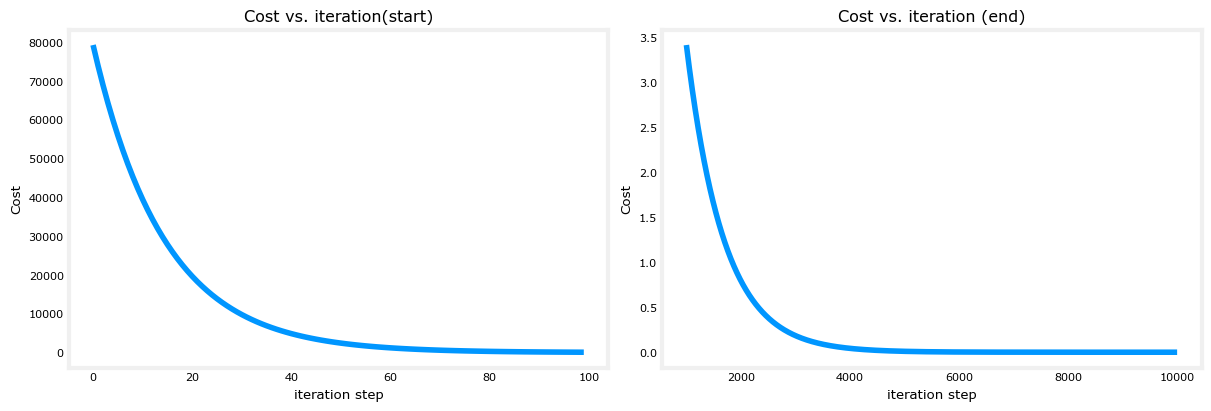

In [9]:
# plot cost versus iteration
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)")
ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel("Cost")
ax2.set_ylabel("Cost")
ax1.set_xlabel("iteration step")
ax2.set_xlabel("iteration step")
plt.show()

In [10]:
# Prediction
print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction 300.0 Thousand dollars
1200 sqft house prediction 340.0 Thousand dollars
2000 sqft house prediction 500.0 Thousand dollars


### Increased Learning Rate


In [12]:
# initialize parameters
w_init = 0
b_init = 0

# some gradient descent settings
iterations = 10
tmp_alpha = 8.0e-1

# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(
    x_train, y_train, w_init, b_init, tmp_alpha, iterations
)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 2.58e+05  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  5.200e+02, b: 3.20000e+02
Iteration    1: Cost 7.82e+05  dj_dw:  1.130e+03, dj_db:  7.000e+02   w: -3.840e+02, b:-2.40000e+02
Iteration    2: Cost 2.37e+06  dj_dw: -1.970e+03, dj_db: -1.216e+03   w:  1.192e+03, b: 7.32800e+02
Iteration    3: Cost 7.19e+06  dj_dw:  3.429e+03, dj_db:  2.121e+03   w: -1.551e+03, b:-9.63840e+02
Iteration    4: Cost 2.18e+07  dj_dw: -5.974e+03, dj_db: -3.691e+03   w:  3.228e+03, b: 1.98886e+03
Iteration    5: Cost 6.62e+07  dj_dw:  1.040e+04, dj_db:  6.431e+03   w: -5.095e+03, b:-3.15579e+03
Iteration    6: Cost 2.01e+08  dj_dw: -1.812e+04, dj_db: -1.120e+04   w:  9.402e+03, b: 5.80237e+03
Iteration    7: Cost 6.09e+08  dj_dw:  3.156e+04, dj_db:  1.950e+04   w: -1.584e+04, b:-9.80139e+03
Iteration    8: Cost 1.85e+09  dj_dw: -5.496e+04, dj_db: -3.397e+04   w:  2.813e+04, b: 1.73730e+04
Iteration    9: Cost 5.60e+09  dj_dw:  9.572e+04, dj_db:  5.916e+04   w: -4.845e+04, b:-2.99567e+04


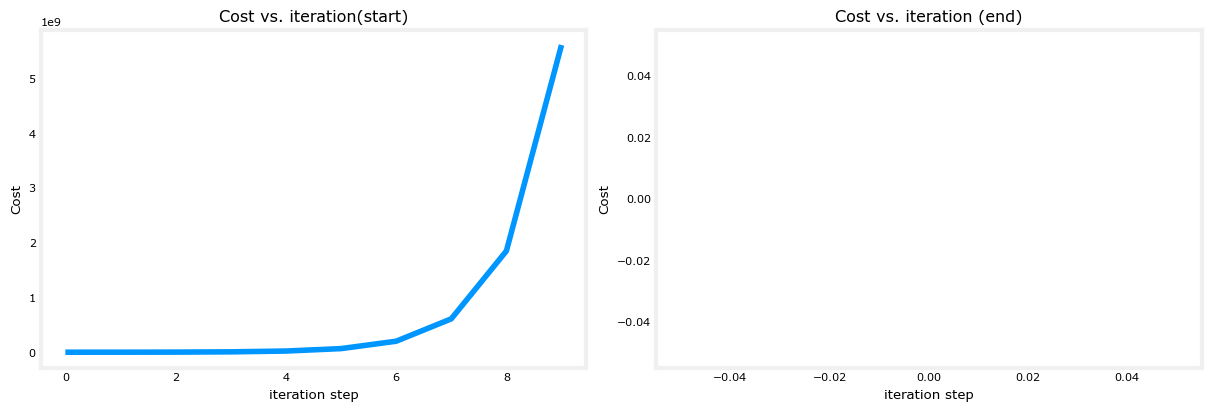

In [13]:
# plot cost versus iteration
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)")
ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel("Cost")
ax2.set_ylabel("Cost")
ax1.set_xlabel("iteration step")
ax2.set_xlabel("iteration step")
plt.show()

In [14]:
# Prediction
print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction -78410.3 Thousand dollars
1200 sqft house prediction -88101.1 Thousand dollars
2000 sqft house prediction -126864.0 Thousand dollars
